In [36]:
# !pip3 install pandas
# !pip3 install seaborn
# !pip3 install matplotlib

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split

In [38]:
layoff_filepath = 'layoffs.csv'
layoffdf = pd.read_csv(layoff_filepath)

**Since the goal of this project is to predict a new target 'Laid off Quarter' based on feature 'date', we decide to add the new target column here before data processing stage. So we can see the potential relationship between target and other features.**


Q1: January, February, March

Q2: April, May, June

Q3: July, August, September

Q4: October, November, December

In [39]:
date_list = layoffdf['date'].values
quarters = []
for date in date_list:
    y_m_d = date.split("-")
    month = int(y_m_d[1])
    if (1<= month <= 3):
        quarter = 1
    elif (4<= month <= 6):
        quarter = 2
    elif (7<= month <= 9):
        quarter = 3
    else:
        quarter = 4
    quarters.append(quarter)
layoffdf['quarters'] = quarters
layoffdf = layoffdf.drop(columns=['date'])

## Data Exploration

In [40]:
layoffdf.head()

,company,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised,quarters
0,New Work,Hamburg,Consumer,400.0,NaN,Post-IPO,Germany,NaN,1
1,Playtika,Tel Aviv,Consumer,300.0,0.10,Post-IPO,Israel,NaN,1
2,Discord,SF Bay Area,Consumer,170.0,0.17,Series H,United States,995.0,1
3,Inmobi,Bengaluru,Marketing,125.0,0.05,Unknown,India,320.0,1
4,Audible,New York City,Media,100.0,0.05,Acquired,United States,14.0,1


In [41]:
layoffdf.shape

(3313, 9)

In [42]:
layoffdf.describe()

,total_laid_off,percentage_laid_off,funds_raised,quarters
count,2189.000000,2141.000000,2962.000000,3313.000000
mean,242.146185,0.277458,775.056616,2.416843
std,767.384119,0.281162,4886.777257,1.074706
min,3.000000,0.000000,0.000000,1.000000
25%,40.000000,0.100000,51.000000,2.000000
50%,80.000000,0.170000,163.000000,2.000000
75%,180.000000,0.300000,454.500000,3.000000
max,12000.000000,1.000000,121900.000000,4.000000


In [43]:
columns = layoffdf.columns
columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'stage', 'country', 'funds_raised', 'quarters'],
      dtype='object')

In [44]:
layoffdf.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
stage                   object
country                 object
funds_raised           float64
quarters                 int64
dtype: object

In [45]:
layoffdf.isnull().sum()

company                   0
location                  1
industry                  1
total_laid_off         1124
percentage_laid_off    1172
stage                     7
country                   0
funds_raised            351
quarters                  0
dtype: int64

In [46]:
print("Percentage of missing values:")
print(f"total_laid_off contains {round((1124 / layoffdf.shape[0]) * 100)} % missing values")
print(f"percentage_laid_off contains {round((1172 / layoffdf.shape[0]) * 100)} % missing values")
print(f"funds_raised contains {round((351 / layoffdf.shape[0]) * 100)} % missing values")

Percentage of missing values:
total_laid_off contains 34 % missing values
percentage_laid_off contains 35 % missing values
funds_raised contains 11 % missing values


## Data Visualizatoin

### Plots for numerical feature: 'total_laid_off'

<AxesSubplot:xlabel='total_laid_off', ylabel='Count'>

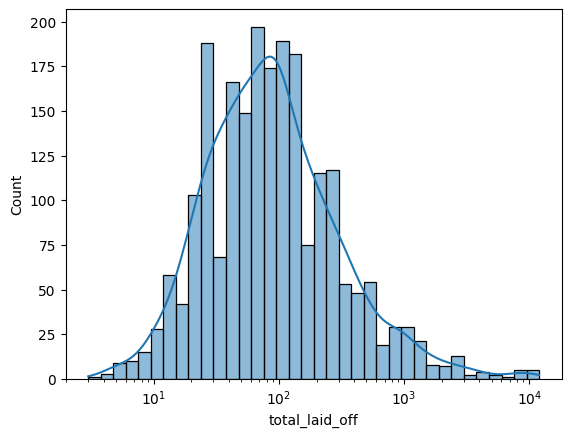

In [47]:
sns.histplot(layoffdf['total_laid_off'],log_scale=True,kde=True)

In [48]:
layoffdf['total_laid_off'].value_counts()

100.0     135
30.0       95
40.0       83
50.0       75
200.0      67
         ... 
6650.0      1
325.0       1
121.0       1
525.0       1
375.0       1
Name: total_laid_off, Length: 330, dtype: int64

### Plots for numerical feature: 'percentage_laid_off'

<AxesSubplot:xlabel='percentage_laid_off', ylabel='Count'>

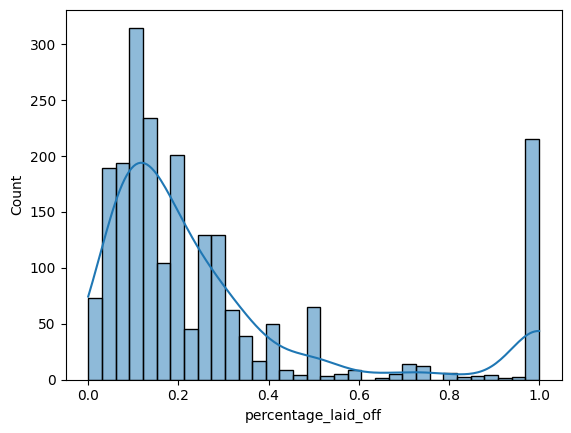

In [49]:
sns.histplot(layoffdf['percentage_laid_off'],kde=True)


In [50]:
layoffdf['percentage_laid_off'].value_counts()

1.000    214
0.100    209
0.200    170
0.150    131
0.250    112
        ... 
0.035      1
0.960      1
0.920      1
0.650      1
0.980      1
Name: percentage_laid_off, Length: 77, dtype: int64

### Plots for numerical feature: 'funds_raised'

In [51]:
funds = list(layoffdf['funds_raised'])
#get rid of NaN for visualization
funds = [x for x in funds if ~np.isnan(x)]
#funds contain minimum number 0, which is unable to use log scale
min(funds)

0.0

<AxesSubplot:ylabel='Count'>

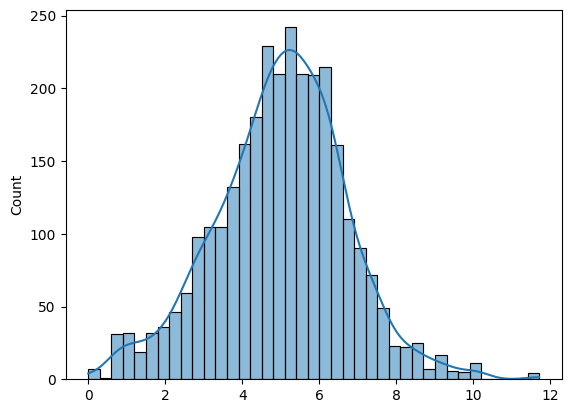

In [52]:
#log1p adds 1 to all the zero numbers
sns.histplot(np.log1p(funds),kde=True)

In [53]:
layoffdf['funds_raised'].value_counts()

1.0       29
1300.0    29
2.0       29
50.0      26
17.0      25
          ..
672.0      1
196.0      1
483.0      1
198.0      1
5.1        1
Name: funds_raised, Length: 712, dtype: int64

### Correlations

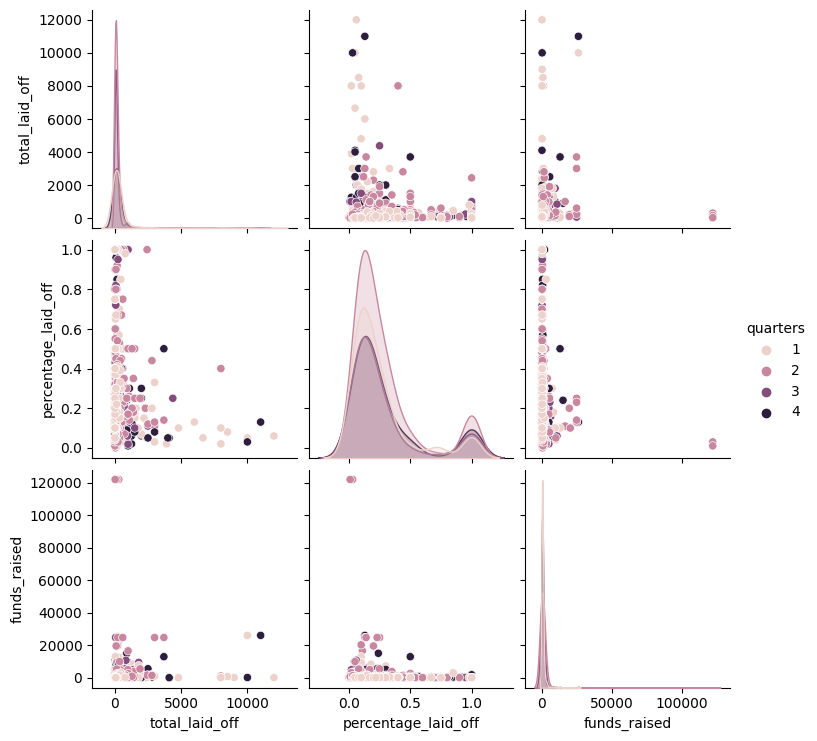

In [54]:
sns.pairplot(layoffdf, hue='quarters')

<AxesSubplot:>

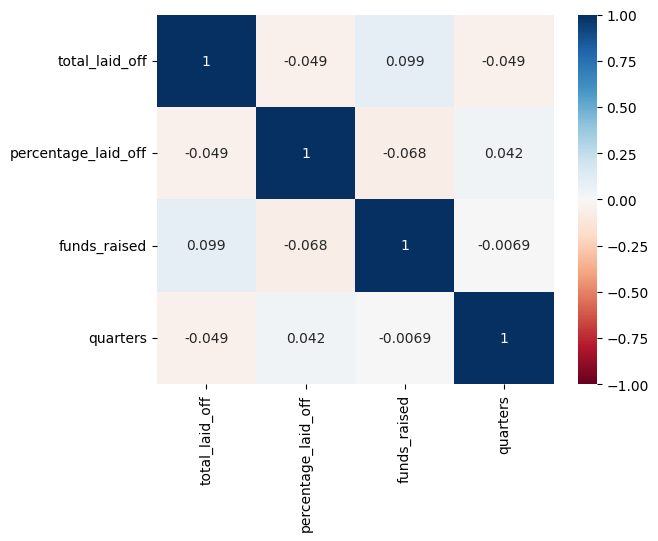

In [55]:
corr = layoffdf.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

### Categorical features

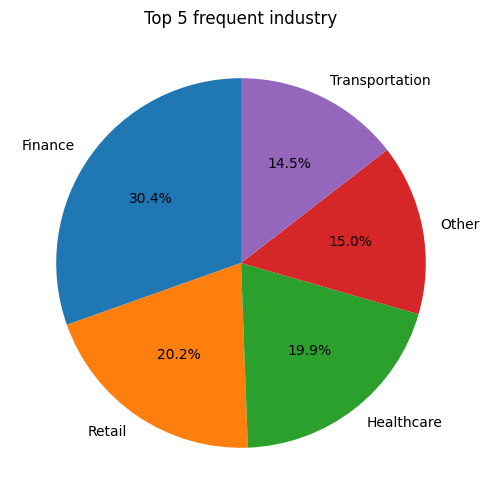

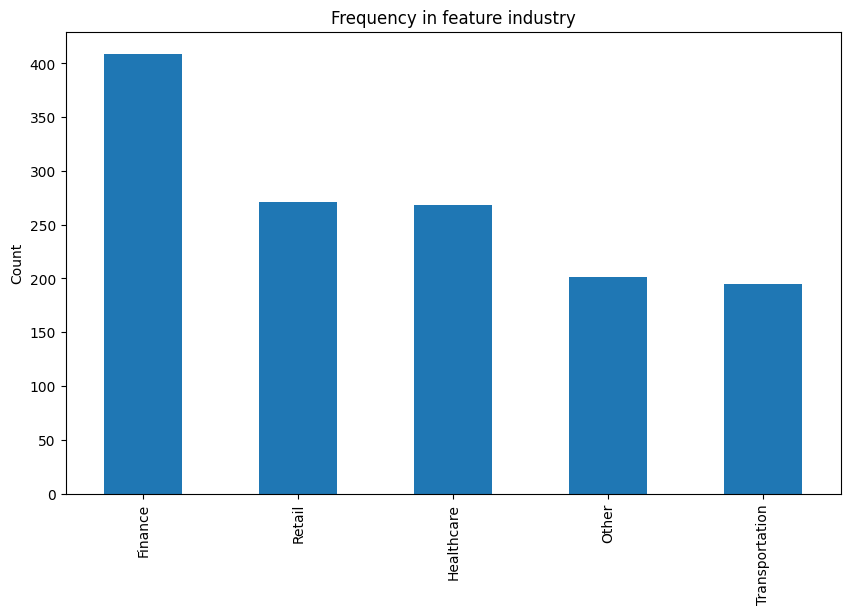

Index(['Finance', 'Retail', 'Healthcare', 'Other', 'Transportation'], dtype='object')


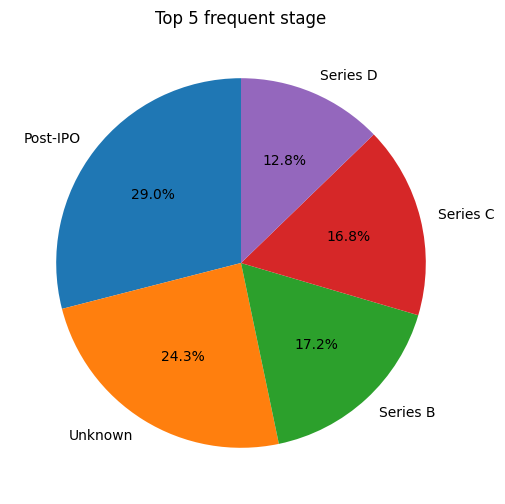

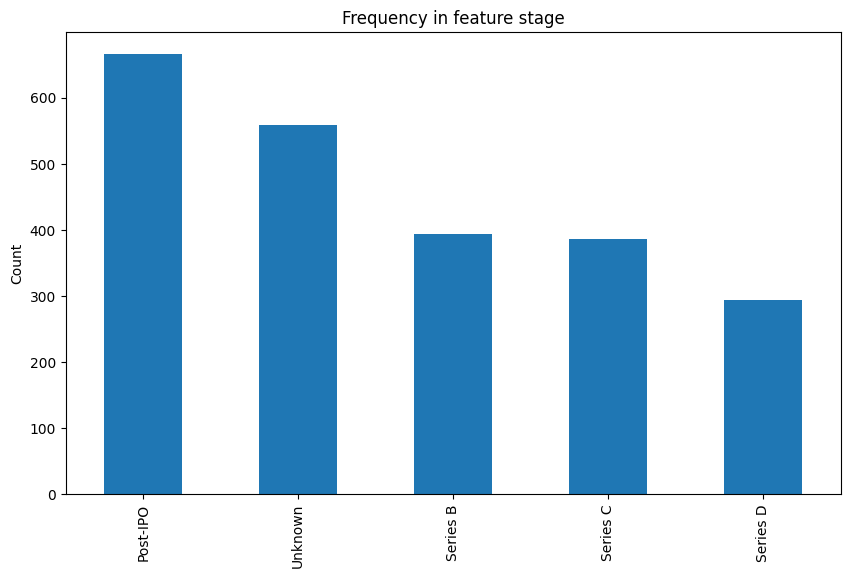

Index(['Post-IPO', 'Unknown', 'Series B', 'Series C', 'Series D'], dtype='object')


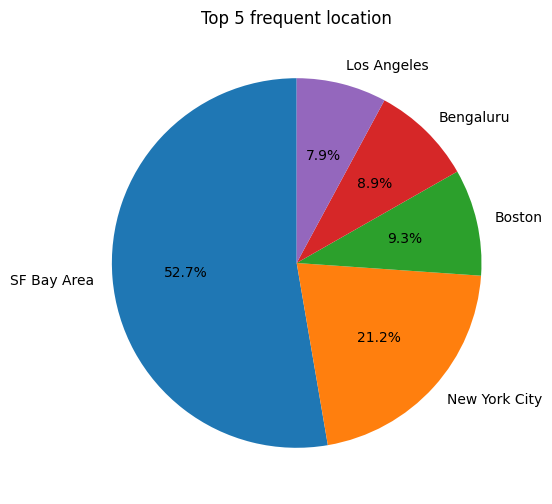

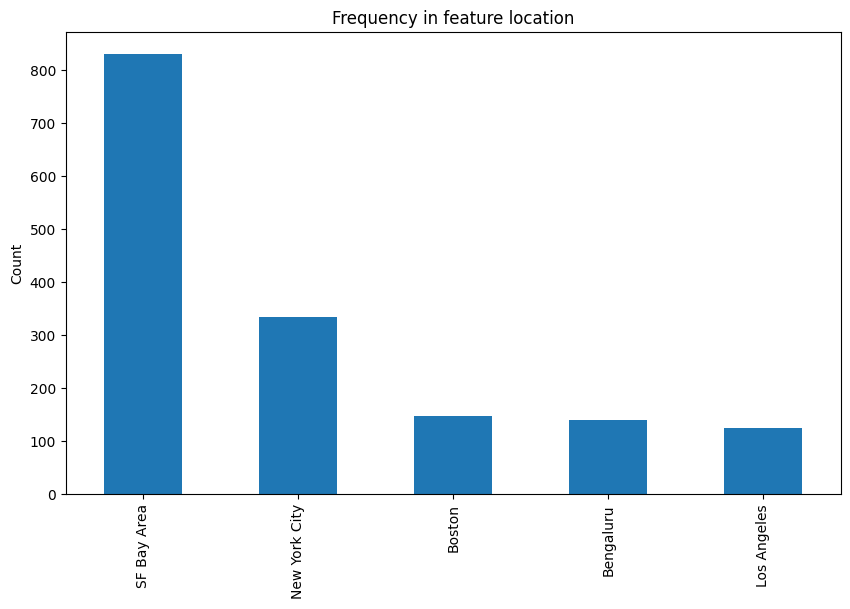

Index(['SF Bay Area', 'New York City', 'Boston', 'Bengaluru', 'Los Angeles'], dtype='object')


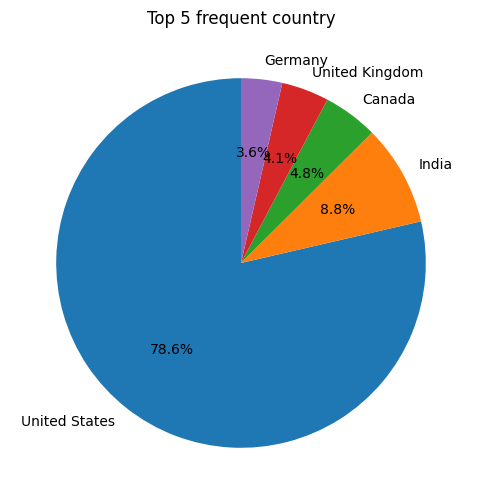

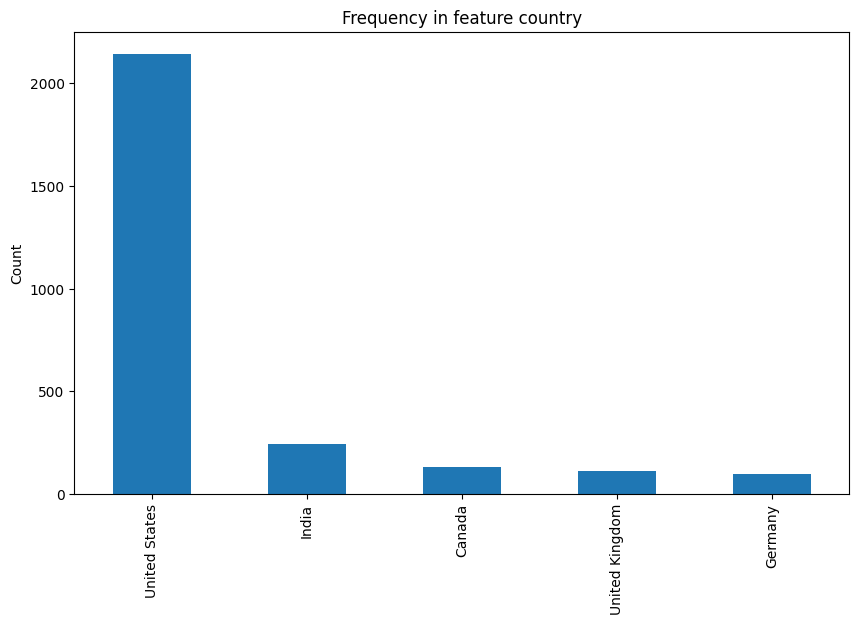

Index(['United States', 'India', 'Canada', 'United Kingdom', 'Germany'], dtype='object')


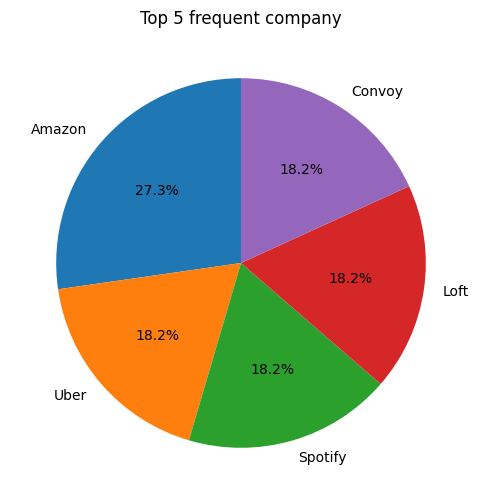

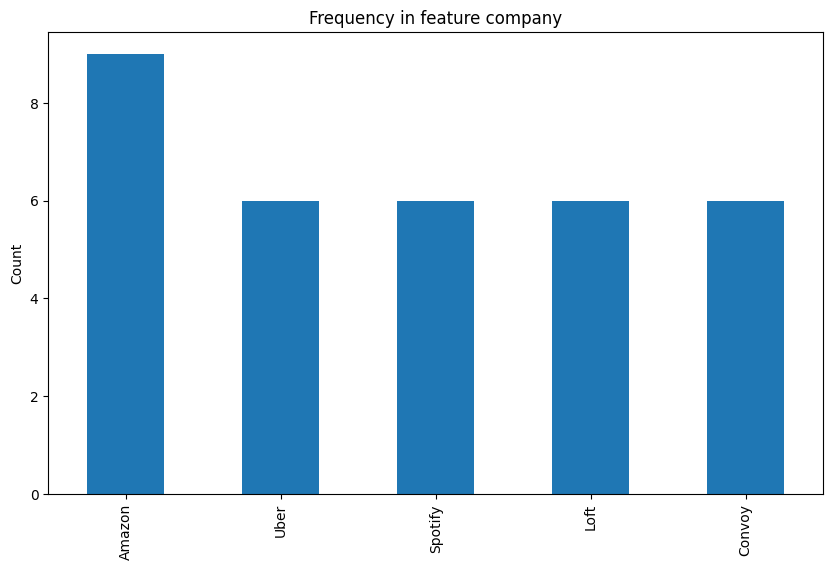

Index(['Amazon', 'Uber', 'Spotify', 'Loft', 'Convoy'], dtype='object')


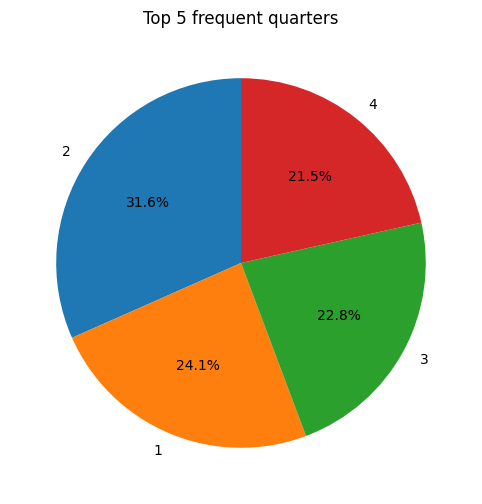

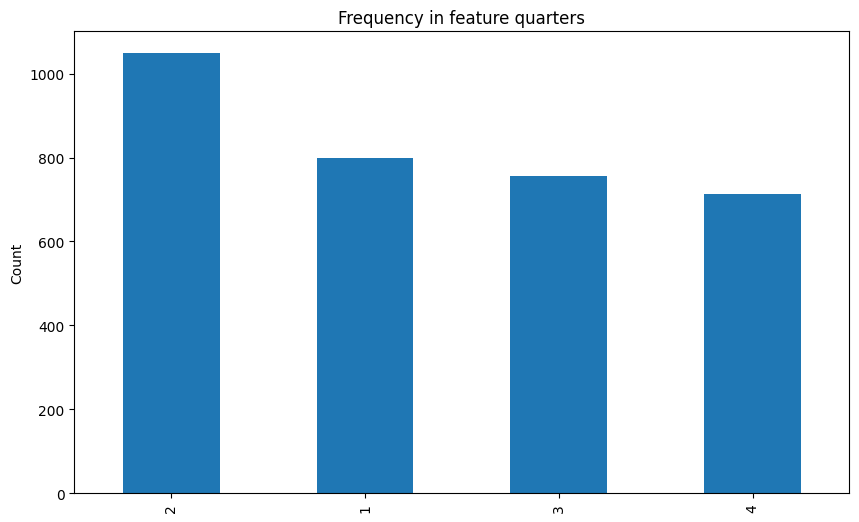

Int64Index([2, 1, 3, 4], dtype='int64')


In [56]:
column_names = ['industry', 'stage','location', 'country','company','quarters']
for column_name in column_names:
    value_counts = layoffdf[column_name].value_counts().head(5)

    # Plot a pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Top 5 frequent {column_name}')
    plt.show()

    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title(f'Frequency in feature {column_name}')
    plt.ylabel('Count')
    plt.show()
    print(value_counts.index)



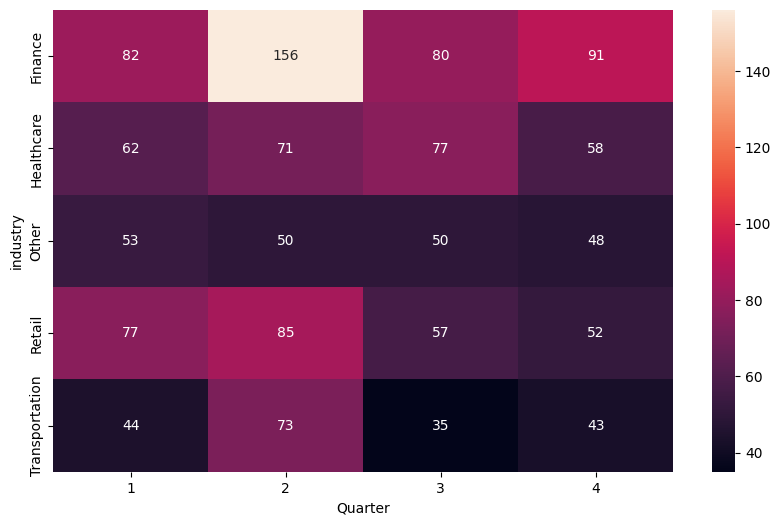

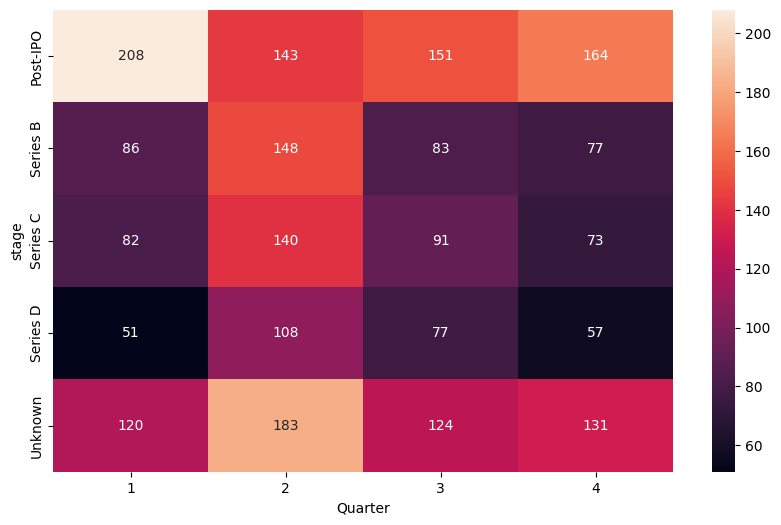

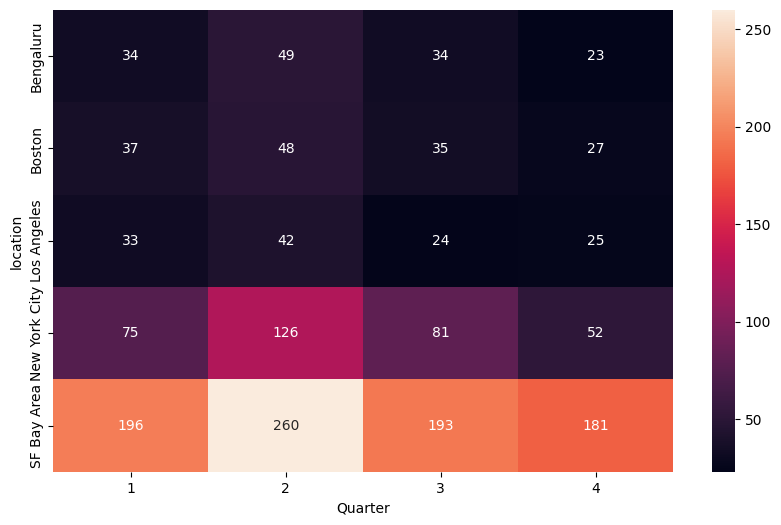

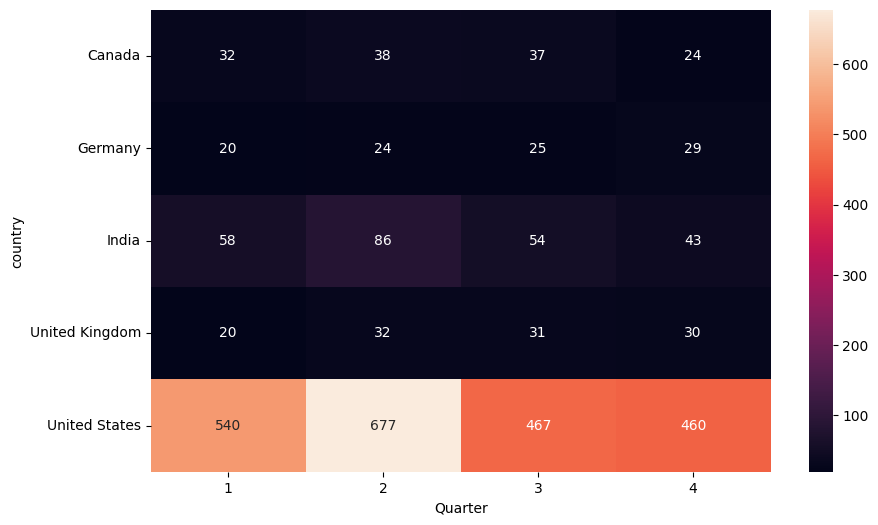

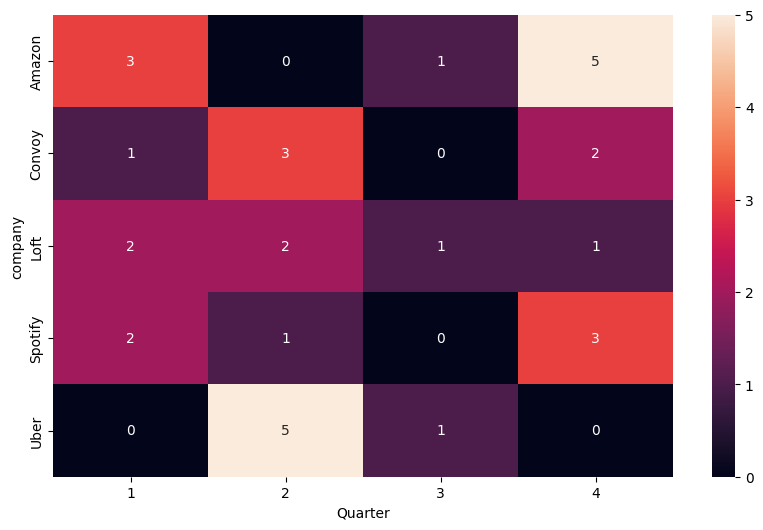

In [57]:
column_names = ['industry', 'stage','location', 'country','company']
for column_name in column_names:
    top_list = layoffdf[column_name].value_counts().head(5).index.tolist()
    new_df = layoffdf[layoffdf[column_name].isin(top_list)]

    new_df = pd.crosstab(new_df[column_name], new_df['quarters'])
    plt.figure(figsize=(10, 6))
    sns.heatmap(new_df, annot=True, fmt='d')
    plt.xlabel('Quarter')
    plt.ylabel(column_name)
    plt.show()

# Data processing

### Handle missing values

We replace the missing numerical values using a descriptive statistic mean

In [58]:
from sklearn.impute import SimpleImputer
columns_to_impute = ['total_laid_off', 'percentage_laid_off', 'funds_raised']
imputer = SimpleImputer(strategy='mean')
layoffdf[columns_to_impute] = imputer.fit_transform(layoffdf[columns_to_impute])
layoffdf.isnull().sum()

company                0
location               1
industry               1
total_laid_off         0
percentage_laid_off    0
stage                  7
country                0
funds_raised           0
quarters               0
dtype: int64

we drop the rows with missing values for categorical features, since there are only few rows that miss data.

In [59]:
columns_with_missing = ['location', 'industry', 'stage']
layoffdf.dropna(subset=columns_with_missing, inplace=True)


In [60]:
layoffdf.isnull().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
stage                  0
country                0
funds_raised           0
quarters               0
dtype: int64

### Rescale data

plan to use neural network models


In [61]:
layoffdf.describe()

,total_laid_off,percentage_laid_off,funds_raised,quarters
count,3304.000000,3304.000000,3304.000000,3304.000000
mean,242.331290,0.277497,774.594803,2.416465
std,624.540473,0.226144,4626.604240,1.074143
min,3.000000,0.000000,0.000000,1.000000
25%,58.750000,0.140000,62.000000,2.000000
50%,185.500000,0.277458,202.000000,2.000000
75%,242.146185,0.277458,681.000000,3.000000
max,12000.000000,1.000000,121900.000000,4.000000


In [62]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
columns_to_normalize = ['total_laid_off', 'funds_raised','percentage_laid_off']
layoffdf[columns_to_normalize] = min_max_scaler.fit_transform(layoffdf[columns_to_normalize])


In [63]:
layoffdf.isnull().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
stage                  0
country                0
funds_raised           0
quarters               0
dtype: int64

### Transform Categorical features

In [64]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
categorical_cols = ['industry', 'stage','location', 'country','company']

encoded_data = encoder.fit_transform(layoffdf[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out( categorical_cols))


In [65]:
encoded_df.index = layoffdf.index
layoffdf = layoffdf.drop(columns=categorical_cols)
layoffdf = pd.concat([layoffdf, encoded_df], axis=1)

In [66]:
layoffdf

,total_laid_off,percentage_laid_off,funds_raised,quarters,industry_AI,industry_Aerospace,industry_Construction,industry_Consumer,industry_Crypto,industry_Data,...,company_iPrice Group,company_iQiyi Smart,company_iRobot,company_iSpecimen,company_inDrive,company_kununu,company_mPharma,company_nCino,company_tZero,company_uShip
0,0.033092,0.277458,0.006358,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.024756,0.100000,0.006358,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.013920,0.170000,0.008162,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.010169,0.050000,0.002625,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.008085,0.050000,0.000115,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,0.019934,1.000000,0.000042,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3309,0.000417,0.100000,0.000369,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3310,0.000250,0.750000,0.000008,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3311,0.001417,0.400000,0.000738,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modeling

In [67]:
from sklearn.model_selection import train_test_split
X = layoffdf.drop('quarters', axis=1)
y = layoffdf['quarters']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### First Model (1): Logistic Regression

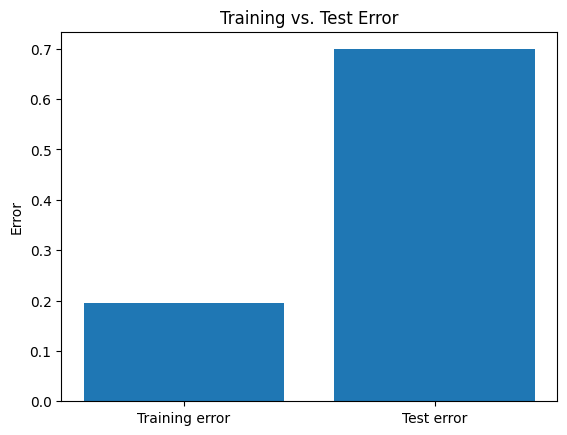

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


model_lg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model_lg.fit(X_train, y_train)
y_train_pred = model_lg.predict(X_train)
y_test_pred = model_lg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Plotting
plt.bar(['Training error', 'Test error'], [1-train_accuracy, 1-test_accuracy])
plt.ylabel('Error')
plt.title('Training vs. Test Error')
plt.show()



### First Model (2): Sequential Model

In [71]:
ohe = OneHotEncoder(categories='auto')
y_encoded = ohe.fit_transform(layoffdf.quarters.values.reshape(-1,1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


Train on 2114 samples, validate on 529 samples
Epoch 1/100
2114/2114 [==============================] - 1s 444us/sample - loss: 1.3785 - accuracy: 0.3051 - val_loss: 1.3597 - val_accuracy: 0.3403
Epoch 2/100
2114/2114 [==============================] - 0s 187us/sample - loss: 1.3359 - accuracy: 0.3453 - val_loss: 1.3468 - val_accuracy: 0.3648
Epoch 3/100
2114/2114 [==============================] - 0s 197us/sample - loss: 1.2428 - accuracy: 0.4716 - val_loss: 1.3487 - val_accuracy: 0.3403
Epoch 4/100
2114/2114 [==============================] - 0s 218us/sample - loss: 1.0411 - accuracy: 0.6400 - val_loss: 1.3938 - val_accuracy: 0.3384
Epoch 5/100
2114/2114 [==============================] - 0s 207us/sample - loss: 0.7510 - accuracy: 0.7881 - val_loss: 1.5195 - val_accuracy: 0.3403


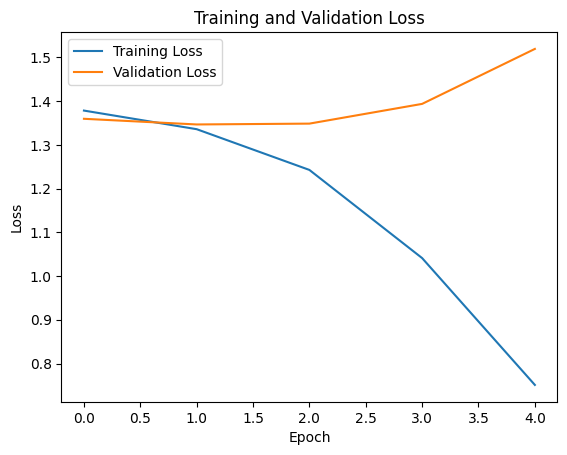

In [75]:
# ohe = OneHotEncoder()
# y = ohe.fit_transform(layoffdf.quarters.values.reshape(-1,1)).toarray()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [76]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

661/661 [==============================] - 0s 96us/sample - loss: 1.3781 - accuracy: 0.3071
Test Loss: 1.3781495344981483
Test Accuracy: 0.30711043
